In [1]:

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import signal

In [2]:
def sinusoid(freq=440, nsamples=2048, srate=22050, amp=1.0, phase = 0.0): 
    dur = nsamples/srate
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

In [3]:
def bin2freq(k,nsamples,srate): 
    return k*srate/nsamples


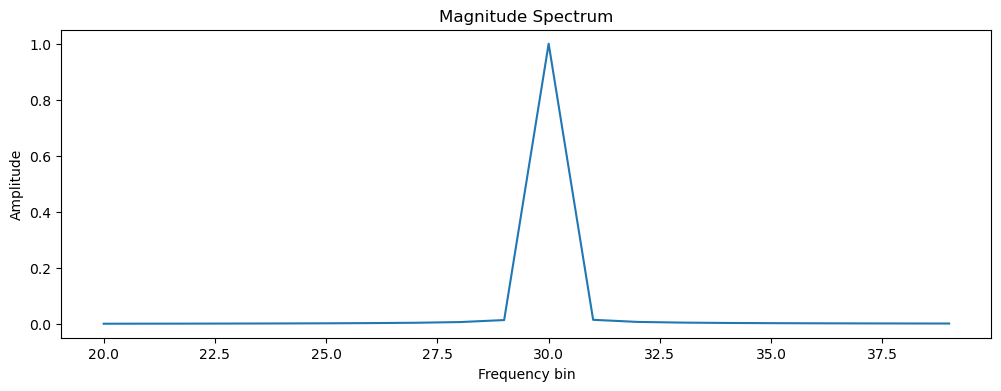

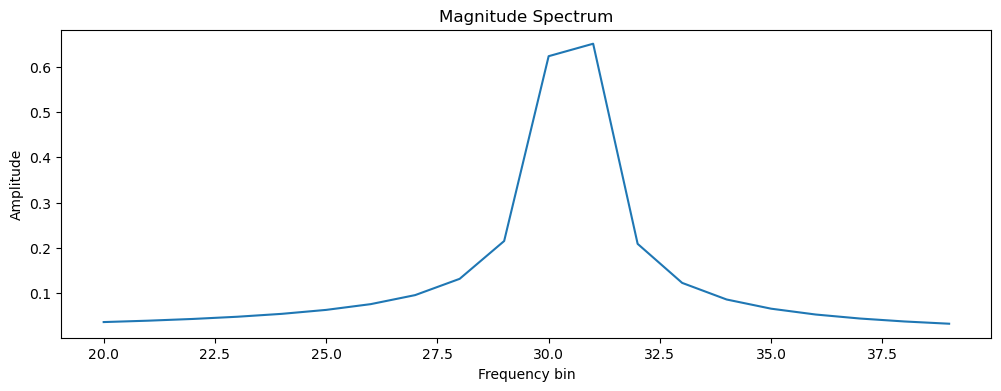

In [4]:
nsamples = 2048
srate = 22050
bin1 = 30 
bin2 = 30.5 

# caclulate the frequencies and corresponding sinusoids 
f1 = bin2freq(bin1,nsamples,srate)
f2 = bin2freq(bin2,nsamples,srate)
s1 = sinusoid(freq=f1, nsamples = nsamples)
s2 = sinusoid(freq=f2, nsamples = nsamples)

# calculate the magnitude spectra 
mspec1 = 2 * np.abs(np.fft.fft(s1))/nsamples
mspec2 = 2 * np.abs(np.fft.fft(s2))/nsamples

def simple_spec_plot(spectrum, start_bin, end_bin): 
    plt.figure(figsize=(12,4))
    plt.xlabel('Frequency bin')
    plt.ylabel('Amplitude')
    plt.title('Magnitude Spectrum')
    nsamples = spectrum.shape[0]
    faxis = np.arange(0, nsamples)
    
    # add appropriate plt.plot command after this comment 
    plt.plot(faxis[start_bin:end_bin], spectrum[start_bin:end_bin])
    
    
    return plt

start_bin = 20
end_bin = 40

p1 = simple_spec_plot(mspec1, start_bin, end_bin)
plt1 = p1.gca()
p1.savefig('mspec1.png', format='png')
p1.show()

p2 = simple_spec_plot(mspec2, start_bin, end_bin)
plt2 = p2.gca()
p2.savefig('mspec2.png', format='png')
p2.show()


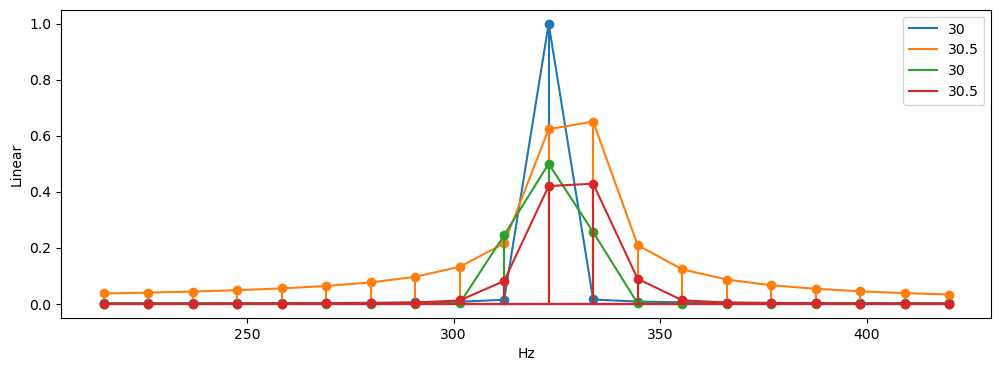

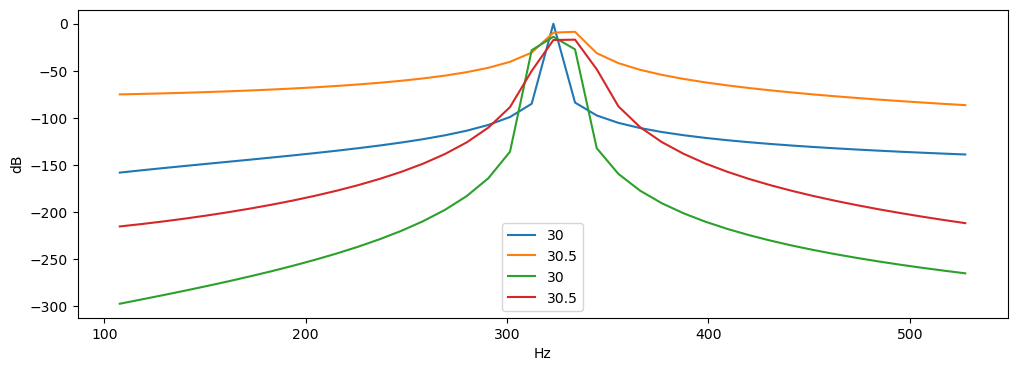

In [6]:
nsamples = 2048
srate = 22050
bin1 = 30 
bin2 = 30.5 
window = signal.windows.hann(nsamples)

f1 = bin2freq(bin1,nsamples, srate)
f2 = bin2freq(bin2,nsamples, srate)
s1 = sinusoid(freq=f1, nsamples = nsamples)
s2 = sinusoid(freq=f2, nsamples = nsamples)

mspec1 = 2 * np.abs(np.fft.fft(s1))/nsamples
mspec2 = 2 * np.abs(np.fft.fft(s2))/nsamples
mspec3 = 2 * np.abs(np.fft.fft(window * s1))/nsamples
mspec4 = 2 * np.abs(np.fft.fft(window * s2))/nsamples

#Write a function `spec_plot` that takes as function parameters a list of magnitude spectra,
#the start_bin and end_bin speciyfing which part of the magnitude spectrum to plot,
#the x-axis label scheme (Bins, Hz, Fractions), the y-axis (Linear, dB), and whether to plot stems or not. 
def spec_plot(spectra, labels, start_bin, end_bin, xaxis = 'Hz', yaxis = 'Linear', plot_stems=True): 
    plt.figure(figsize=(12,4))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    nsamples = spectra[0].shape[0]
    
    faxes = {}
    faxes['Bins'] = np.arange(0, nsamples)
    # Add appropriate code in the two lines below after uncommenting them 
    faxes['Hz'] = np.arange(0, nsamples) * srate/nsamples
    faxes['Fractions'] = np.arange(0, nsamples) * 1.0/nsamples
    f = faxes[xaxis]
    

    for (spectrum,label) in zip(spectra,labels): 
        if (yaxis == 'dB'): 
            spectrum = 20.0 * np.log(spectrum)
        
        p = plt.plot(f[start_bin:end_bin], spectrum[start_bin:end_bin], label=label)
        
        c=p[0].get_color()


        if plot_stems:
            plt.stem(f[start_bin:end_bin], spectrum[start_bin:end_bin], linefmt=c)
    plt.legend()
    return plt
                  
start_bin = 20
end_bin = 40
spectra = [mspec1, mspec2, mspec3, mspec4]
labels = [str(bin1), str(bin2), str(bin1), str(bin2)]

p1 = spec_plot(spectra,labels, start_bin, end_bin)
plt1 = p1.gca()
p1.savefig('mspec3.png', format='png')
p1.show()


start_bin = 10 
end_bin = 50
p2 = spec_plot(spectra, labels, start_bin, end_bin, yaxis='dB', plot_stems=False)
plt2 = p2.gca()
p2.savefig('mspec4.png', format='png')
p2.show()




